(2688, 2688)


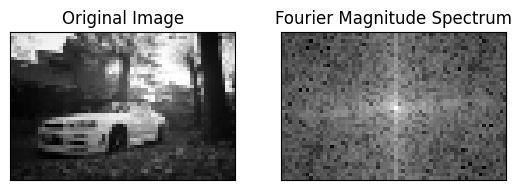

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
path = r"C:\Users\Gurukumar\Pictures\Saved Pictures\wallpaperflare.com_wallpaper (1).jpg"
img = cv2.imread(path, 0)

downsampled_img = img.copy()
for _ in range(5):
    downsampled_img = cv2.resize(downsampled_img, (downsampled_img.shape[1] // 2, downsampled_img.shape[0] // 2))

# Compute the FFT of the downsampled image
fft_result = np.fft.fftshift(np.fft.fft2(downsampled_img))

# Compute the magnitude spectrum (log scale for visualization)
magnitude_spectrum = 20 * np.log(np.abs(fft_result))

# Compute the covariance matrix
N = magnitude_spectrum.size
covariance_mm = np.zeros((N, N), dtype=np.complex128)
for i in range(N):
    covariance_mm[i] = magnitude_spectrum.flatten() * np.conj(magnitude_spectrum.flatten()[i])

# Print the shape of covariance_mm
print(np.shape(covariance_mm))

# Plot the original image and its magnitude spectrum
plt.subplot(121), plt.imshow(downsampled_img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Fourier Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


In [25]:
eigenvalues_array = np.linalg.eigvals(covariance_mm)
print(eigenvalues_array)

[ 5.01158532e+07+0.00000000e+00j  6.93864988e-10-6.29178694e-09j
 -6.49220581e-09+3.37011476e-24j ...  8.75438952e-28+1.53435241e-27j
  2.78606269e-27-2.12137372e-42j  4.21297484e-27-3.05213936e-42j]


In [26]:
eigenvalues, eigenvectors = np.linalg.eigh(covariance_mm)

# Create a diagonal matrix with eigenvalues
eigenvalues_matrix = np.diag(eigenvalues)

# Verify the shape
print("Shape of eigenvalues matrix:", eigenvalues_matrix.shape)



Shape of eigenvalues matrix: (2688, 2688)


In [29]:

angles=np.arange(-np.pi/2,np.pi/2,360)

# Compute the angles
N=np.size(magnitude_spectrum)
steering_vector = np.exp(1j * 2 * np.pi * magnitude_spectrum * np.sin(angles))
steering_vector=steering_vector / np.sqrt(N)

# Compute the covariance matrix
print(np.shape(steering_vectors))
print(np.shape(eigenvalues_matrix))

(2688, 180)
(2688, 2688)


In [42]:
num_angles = 180

# Compute the angles
angles = np.linspace(-np.pi/2, np.pi/2, num_angles)

# Compute the steering vectors
steering_vector = np.exp(1j * 2 * np.pi * np.outer(magnitude_spectrum.flatten(), np.sin(angles)))
steering_vector /= np.sqrt(steering_vector.shape[0])  # Normalize the steering vectors

# Compute the covariance matrix
print(np.shape(steering_vector))
print(np.shape(eigenvalues_matrix))
print(steering_vector)
print(eigenvalues_matrix)


(2688, 180)
(180, 180)
[[-0.01822536-0.00631348j -0.01729378-0.00854101j -0.01295292-0.01429146j
  ... -0.01295292+0.01429146j -0.01729378+0.00854101j
  -0.01822536+0.00631348j]
 [-0.00265637+0.01910412j -0.00457551+0.01873736j -0.00997451+0.01650857j
  ... -0.00997451-0.01650857j -0.00457551-0.01873736j
  -0.00265637-0.01910412j]
 [-0.01586098-0.01097512j -0.01460024-0.01260384j -0.00988647-0.01656145j
  ... -0.00988647+0.01656145j -0.01460024+0.01260384j
  -0.01586098+0.01097512j]
 ...
 [ 0.01357058-0.01370632j  0.01497502-0.01215617j  0.01807585-0.00672961j
  ...  0.01807585+0.00672961j  0.01497502+0.01215617j
   0.01357058+0.01370632j]
 [ 0.00265045+0.01910494j  0.00046066+0.01928242j -0.00603027+0.01832102j
  ... -0.00603027-0.01832102j  0.00046066-0.01928242j
   0.00265045-0.01910494j]
 [ 0.01231673-0.01484325j  0.0140452 -0.01321954j  0.01786825-0.00726287j
  ...  0.01786825+0.00726287j  0.0140452 +0.01321954j
   0.01231673+0.01484325j]]
[[-6.87788791e-08  0.00000000e+00  0.0000

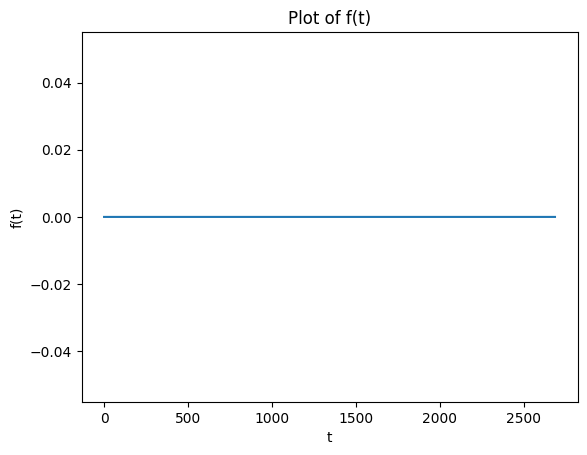

In [41]:
# Define the range of indices for the summation from p+1 to N
rank_p = 180  # Example value for p
indices = np.arange(rank_p, magnitude_spectrum.shape[0])

# Compute f(t) for each value of t
if len(indices) > 0:
    f_values = np.sum(1 / np.conj(steering_vector[:, indices]) * eigenvalues_matrix[indices, None], axis=1)
else:
    f_values = np.zeros(N)

# Plot f(t) versus t
plt.plot(f_values)
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Plot of f(t)')
plt.show()


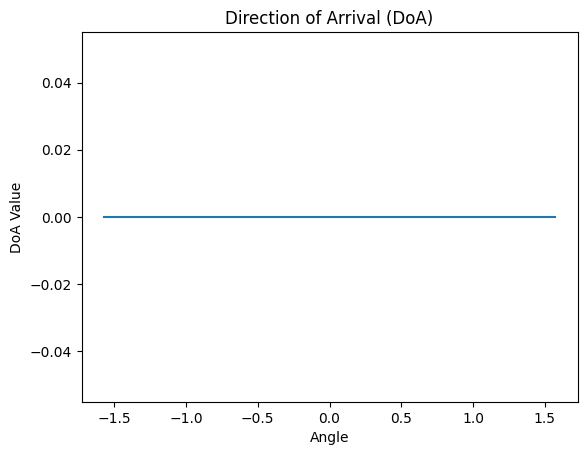

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
path = r"C:\Users\Gurukumar\Pictures\Saved Pictures\wallpaperflare.com_wallpaper (1).jpg"
img = cv2.imread(path, 0)

downsampled_img = img.copy()
for _ in range(5):
    downsampled_img = cv2.resize(downsampled_img, (downsampled_img.shape[1] // 2, downsampled_img.shape[0] // 2))

# Compute the FFT of the downsampled image
fft_result = np.fft.fftshift(np.fft.fft2(downsampled_img))

# Compute the magnitude spectrum (log scale for visualization)
magnitude_spectrum = 20 * np.log(np.abs(fft_result))

# Compute the covariance matrix
N = magnitude_spectrum.size
covariance_mm = np.zeros((N, N), dtype=np.complex128)
for i in range(N):
    covariance_mm[i] = magnitude_spectrum.flatten() * np.conj(magnitude_spectrum.flatten()[i])

# Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(covariance_mm)

# Create a diagonal matrix with eigenvalues
eigenvalues_matrix = np.diag(eigenvalues)

# Compute the angles
num_angles = 180
angles = np.linspace(-np.pi/2, np.pi/2, num_angles)

# Compute the steering vectors
steering_vector = np.exp(1j * 2 * np.pi * np.outer(magnitude_spectrum.flatten(), np.sin(angles)))
steering_vector /= np.sqrt(steering_vector.shape[0])  # Normalize the steering vectors

# Define the range of indices for the summation from p+1 to N
rank_p = 180  # Example value for p
indices = np.arange(rank_p, magnitude_spectrum.shape[0])

# Compute f(t) for each angle
if len(indices) > 0:
    f_values = np.sum(1 / np.conj(steering_vector[:, indices]) * eigenvalues_matrix[indices, None], axis=0)
else:
    f_values = np.zeros(num_angles)

# Plot f(t) versus angles
plt.plot(angles, np.abs(f_values))
plt.xlabel('Angle')
plt.ylabel('DoA Value')
plt.title('Direction of Arrival (DoA)')
plt.show()


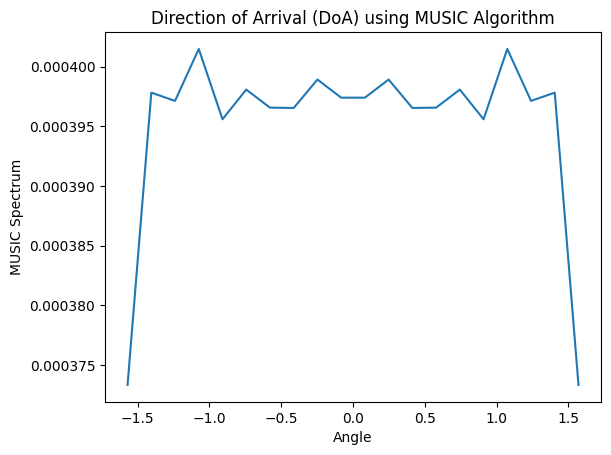

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
path = r"C:\Users\Gurukumar\Pictures\Saved Pictures\wallpaperflare.com_wallpaper (1).jpg"
img = cv2.imread(path, 0)

downsampled_img = img.copy()
for _ in range(5):
    downsampled_img = cv2.resize(downsampled_img, (downsampled_img.shape[1] // 2, downsampled_img.shape[0] // 2))

# Compute the FFT of the downsampled image
fft_result = np.fft.fftshift(np.fft.fft2(downsampled_img))

# Compute the magnitude spectrum (log scale for visualization)
magnitude_spectrum = 20 * np.log(np.abs(fft_result))

# Compute the covariance matrix
N = magnitude_spectrum.size
covariance_mm = np.zeros((N, N), dtype=np.complex128)
for i in range(N):
    covariance_mm[i] = magnitude_spectrum.flatten() * np.conj(magnitude_spectrum.flatten()[i])

# Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(covariance_mm)

# Create a diagonal matrix with eigenvalues
eigenvalues_matrix = np.diag(eigenvalues)

# Define the number of angles for DoA estimation
num_angles =20
angles = np.linspace(-np.pi/2, np.pi/2, num_angles)

# Compute the steering vectors
steering_vectors = np.exp(1j * 2 * np.pi * np.outer(np.sin(angles), np.arange(N)))

# Compute the numerator of the MUSIC spectrum
numerator = np.abs(np.dot(steering_vectors, eigenvectors[:, rank_p:]))

# Compute the MUSIC spectrum
music_spectrum = 1 / np.sum(numerator**2, axis=1)

# Plot the MUSIC spectrum
plt.plot(angles, music_spectrum)
plt.xlabel('Angle')
plt.ylabel('MUSIC Spectrum')
plt.title('Direction of Arrival (DoA) using MUSIC Algorithm')
plt.show()



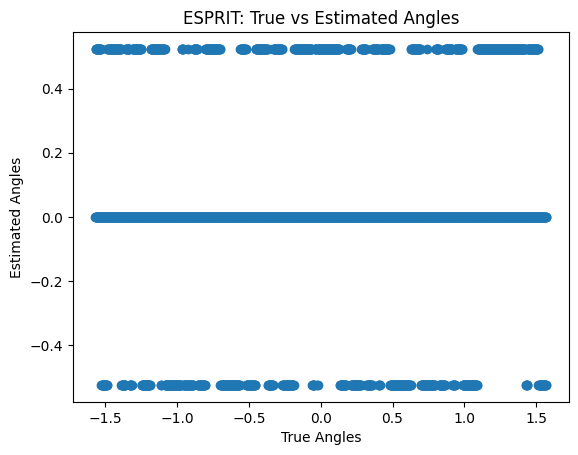

In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
path = r"C:\Users\Gurukumar\Pictures\Saved Pictures\wallpaperflare.com_wallpaper (1).jpg"
img = cv2.imread(path, 0)

downsampled_img = img.copy()
for _ in range(5):
    downsampled_img = cv2.resize(downsampled_img, (downsampled_img.shape[1] // 2, downsampled_img.shape[0] // 2))

# Compute the FFT of the downsampled image
fft_result = np.fft.fftshift(np.fft.fft2(downsampled_img))

# Compute the magnitude spectrum (log scale for visualization)
magnitude_spectrum = 20 * np.log(np.abs(fft_result))

# Compute the covariance matrix
N = magnitude_spectrum.size
covariance_mm = np.zeros((N, N), dtype=np.complex128)
for i in range(N):
    covariance_mm[i] = magnitude_spectrum.flatten() * np.conj(magnitude_spectrum.flatten()[i])

# Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(covariance_mm)

# Create a diagonal matrix with eigenvalues
eigenvalues_matrix = np.diag(eigenvalues)

# Define the number of angles for DoA estimation
num_angles = 2507  # Adjusted to match the length of esprit_angles
angles = np.linspace(-np.pi/2, np.pi/2, num_angles)

# Plot the estimated angles

# Compute the steering vectors
steering_vectors = np.exp(1j * 2 * np.pi * np.outer(np.sin(angles), np.arange(N)))

# Compute the signal subspace matrix
signal_subspace_matrix = eigenvectors[:, rank_p:]

# Compute the difference matrix
difference_matrix = np.diff(signal_subspace_matrix, axis=1)

# Perform ESPRIT algorithm to estimate frequencies (angles)
U, s, Vh = np.linalg.svd(difference_matrix)
esprit_angles = np.arcsin(np.angle(Vh[0]) / (2 * np.pi))

# Plot the estimated angles
plt.plot(angles, esprit_angles, 'o')
plt.xlabel('True Angles')
plt.ylabel('Estimated Angles')
plt.title('ESPRIT: True vs Estimated Angles')
plt.show()
